In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
import random
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn import datasets, metrics, model_selection, svm
from sklearn.datasets import make_classification
from sklearn.metrics import RocCurveDisplay
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pickle as pk

In [8]:
df = pd.read_csv(r"mushrooms.csv")
print(df)

     class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0        p         x           s         n       t    p               f   
1        e         x           s         y       t    a               f   
2        e         b           s         w       t    l               f   
3        p         x           y         w       t    p               f   
4        e         x           s         g       f    n               f   
...    ...       ...         ...       ...     ...  ...             ...   
8119     e         k           s         n       f    n               a   
8120     e         x           s         n       f    n               a   
8121     e         f           s         n       f    n               a   
8122     p         k           y         n       f    y               f   
8123     e         x           s         n       f    n               a   

     gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0               c         n

In [9]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [10]:
#Check if there are any NAN values in the dataset

df.isnull().values.any()

False

In [11]:
target = df['class']

In [12]:
for column in df:
    df[column] = pd.factorize(df[column])[0]
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
2,1,1,0,2,0,2,0,0,1,1,...,0,0,0,0,0,0,0,1,1,2
3,0,0,1,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,3,1,3,0,1,1,0,...,0,0,0,0,0,0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,4,0,0,1,3,1,0,1,10,...,0,6,7,0,2,0,0,8,5,6
8120,1,0,0,0,1,3,1,0,1,10,...,0,6,7,0,1,0,0,8,3,6
8121,1,3,0,0,1,3,1,0,1,1,...,0,6,7,0,2,0,0,8,5,6
8122,0,4,1,0,1,6,0,0,0,8,...,3,0,0,0,0,0,1,4,3,6


In [13]:
col = 'veil-type'
df = df.loc[:, df.columns != col]

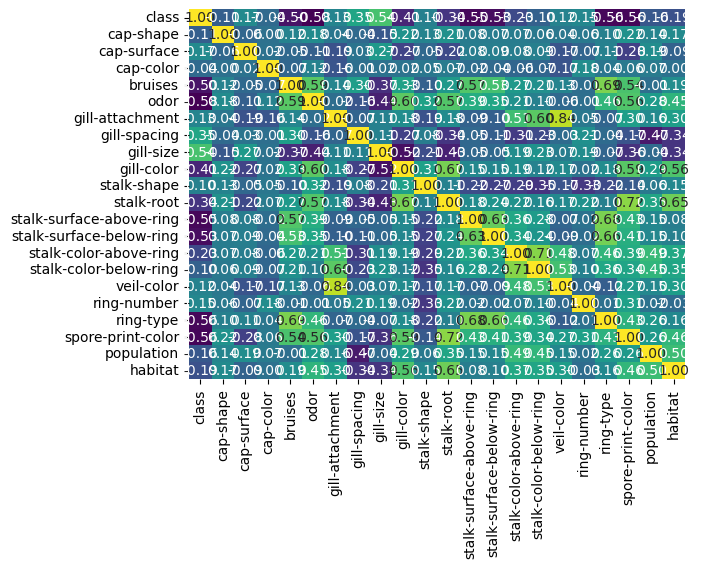

In [14]:
fig, ax = plt.subplots()
sns.heatmap(df.corr(method='pearson'), annot=True, fmt='.2f', 
            cmap=plt.get_cmap(), cbar=False, ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
plt.savefig('result.png', bbox_inches='tight', pad_inches=0.0)

In [15]:
y = df['class']
col = 'class'
X = df.loc[:, df.columns != col]

rem_X, test_X, rem_y, test_y = train_test_split(X,y, test_size=0.1, random_state=42, shuffle=True)
train_X, valid_X, train_y, valid_y = train_test_split(rem_X, rem_y, test_size=0.2)

In [129]:
basemodel = LogisticRegression().fit(X, y)
basemodel.score(valid_X, valid_y)

C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.987012987012987

In [130]:
basemodel.score(test_X, test_y)

0.976629766297663

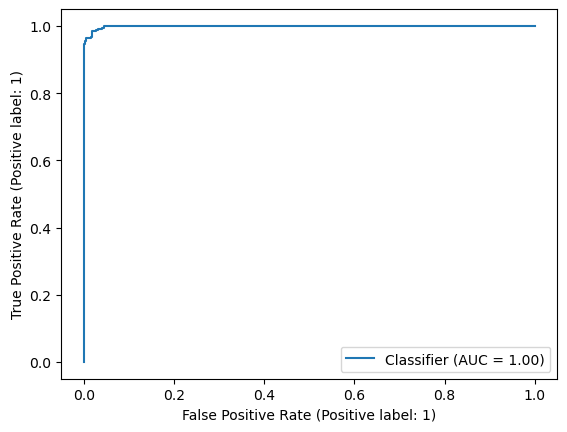

In [59]:
y_pred = basemodel.decision_function(test_X)
RocCurveDisplay.from_predictions(test_y, y_pred)

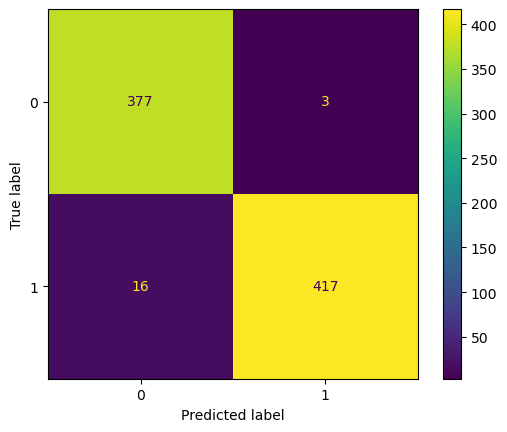

In [140]:
predictions = basemodel.predict(test_X)
cm = confusion_matrix(test_y, predictions, labels=basemodel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=basemodel.classes_)
disp.plot()
fig = plt.gcf()
plt.show()
fig.savefig('BaseModel_ConfusionMatrixLog.png')

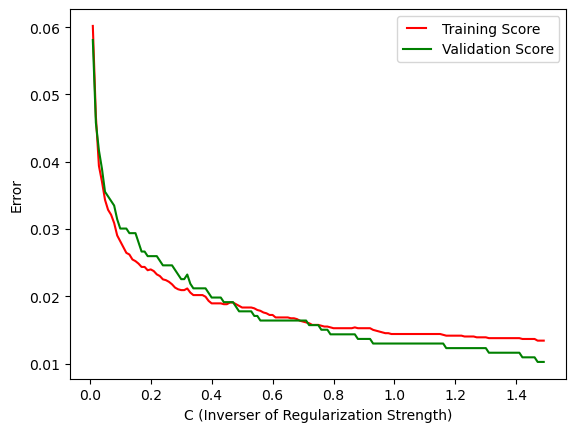

In [131]:
train_results = []
test_results = []
test = []
Cs = np.arange(0.01, 1.5, 0.01)

for C in Cs:
    model = LogisticRegression(C=C, max_iter = 1000).fit(X,y)
    model.score(valid_X, valid_y)
    
    test.append(model.score(valid_X, valid_y))
    train_results.append(1 - (model.score(X,y)))
    test_results.append(1 - (model.score(valid_X, valid_y)))

line1, = plt.plot(Cs, train_results, color="r", label="Training Score")
line2, = plt.plot(Cs, test_results, color="g", label="Validation Score")

fig = plt.gcf()
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Error')
plt.xlabel('C (Inverser of Regularization Strength)')
plt.show()
fig.savefig('BaseModel_C.png')

C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

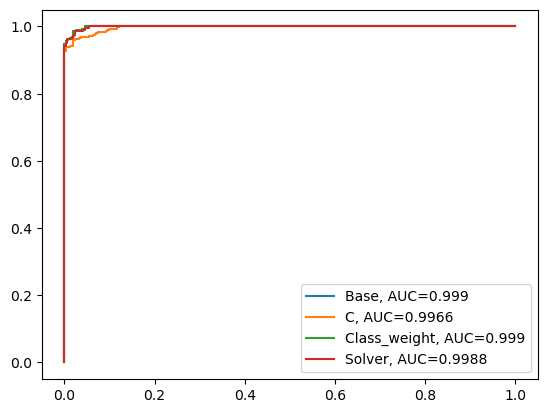

In [61]:
model = LogisticRegression()
model.fit(X, y)
y_pred = model.predict_proba(test_X)[:, 1]
fpr, tpr, _ = metrics.roc_curve(test_y, y_pred)
auc = round(metrics.roc_auc_score(test_y, y_pred), 4)
plt.plot(fpr,tpr,label="Base, AUC="+str(auc))

#fit gradient boosted model and plot ROC curve
model = LogisticRegression(C = 0.1)
model.fit(X, y)
y_pred = model.predict_proba(test_X)[:, 1]
fpr, tpr, _ = metrics.roc_curve(test_y, y_pred)
auc = round(metrics.roc_auc_score(test_y, y_pred), 4)
plt.plot(fpr,tpr,label="C, AUC="+str(auc))

model = LogisticRegression(class_weight='balanced')
model.fit(X, y)
y_pred = model.predict_proba(test_X)[:, 1]
fpr, tpr, _ = metrics.roc_curve(test_y, y_pred)
auc = round(metrics.roc_auc_score(test_y, y_pred), 4)
plt.plot(fpr,tpr,label="Class_weight, AUC="+str(auc))

model = LogisticRegression(solver='saga')
model.fit(X, y)
y_pred = model.predict_proba(test_X)[:, 1]
fpr, tpr, _ = metrics.roc_curve(test_y, y_pred)
auc = round(metrics.roc_auc_score(test_y, y_pred), 4)
plt.plot(fpr,tpr,label="Solver, AUC="+str(auc))


#add legend
plt.legend()

# Gradient Boosting

In [135]:
model = GradientBoostingClassifier(verbose=1).fit(train_X, train_y)

      Iter       Train Loss   Remaining Time 
         1           1.2035            0.28s
         2           1.0556            0.31s
         3           0.9324            0.29s
         4           0.8284            0.29s
         5           0.7397            0.25s
         6           0.6636            0.21s
         7           0.5975            0.18s
         8           0.5399            0.15s
         9           0.4899            0.27s
        10           0.4456            0.27s
        20           0.1927            0.23s
        30           0.0909            0.18s
        40           0.0514            0.16s
        50           0.0313            0.14s
        60           0.0194            0.11s
        70           0.0132            0.09s
        80           0.0090            0.06s
        90           0.0062            0.03s
       100           0.0042            0.00s


In [136]:
model.score(valid_X, valid_y)

1.0

In [137]:
model.score(test_X, test_y)

1.0

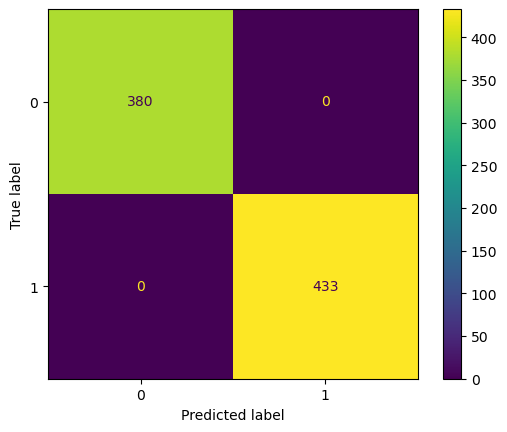

In [139]:
predictions = model.predict(test_X)
cm = confusion_matrix(test_y, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
fig = plt.gcf()
plt.show()
fig.savefig('BaseModel_ConfusionMatrixGradBoost.png')

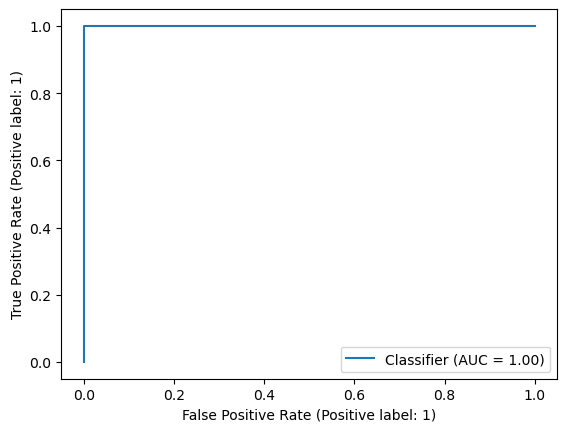

In [65]:
y_pred = model.decision_function(test_X)
RocCurveDisplay.from_predictions(test_y, y_pred) 

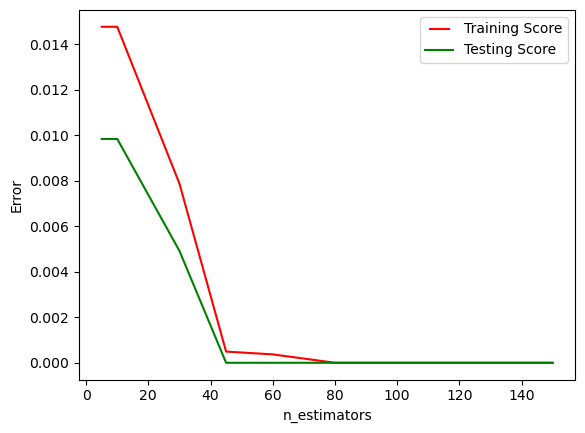

In [108]:
train_results = []
test_results = []
list_nb_trees = [5, 10, 30, 45, 60, 80, 100, 150]

for nb_trees in list_nb_trees:
    modelG = GradientBoostingClassifier(n_estimators= nb_trees)
    modelG.fit(X, y)

    train_results.append(1 - (modelG.score(X,y)))
    test_results.append(1 - (modelG.score(test_X, test_y)))

line1, = plt.plot(list_nb_trees, train_results, color="r", label="Training Score")
line2, = plt.plot(list_nb_trees, test_results, color="g", label="Testing Score")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Error')
plt.xlabel('n_estimators')
fig = plt.gcf()
plt.show()
fig.savefig('BaseGradientBoostingClassifier.png')

In [67]:
# pca = PCA().fit(valid_X, valid_y)
# plt.rcParams["figure.figsize"] = (12,6)

# fig, ax = plt.subplots()
# xi = np.arange(1, 22, step=1)
# y = np.cumsum(pca.explained_variance_ratio_)

# plt.ylim(0.0,1.1)
# plt.plot(xi, y, marker='o', linestyle='--', color='b')

# plt.xlabel('Number of Components')
# plt.xticks(np.arange(0, 22, step=1)) #change from 0-based array index to 1-based human-readable label
# plt.ylabel('Cumulative variance (%)')
# plt.title('The number of components needed to explain variance')

# plt.axhline(y=0.95, color='r', linestyle='-')
# plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

# ax.grid(axis='x')
# plt.show()

In [68]:
# (pca.explained_variance_ratio_)

In [69]:
# pca.feature_names_in_

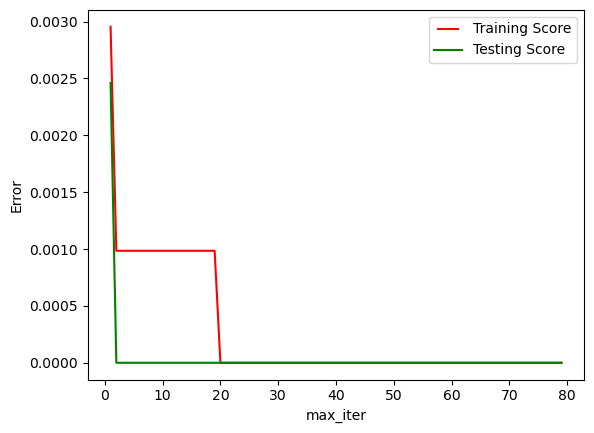

In [70]:
train_results = []
test_results = []
list_nb_trees = range(1,80)

for nb_trees in list_nb_trees:
    modelG = HistGradientBoostingClassifier(max_iter= nb_trees)
    modelG.fit(X, y)

    train_results.append(1 - (modelG.score(X,y)))
    test_results.append(1 - (modelG.score(test_X, test_y)))

line1, = plt.plot(list_nb_trees, train_results, color="r", label="Training Score")
line2, = plt.plot(list_nb_trees, test_results, color="g", label="Testing Score")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Error')
plt.xlabel('max_iter')
fig = plt.gcf()
plt.show()
fig.savefig('BaseHistogramGradientBoostingClassifier.png')

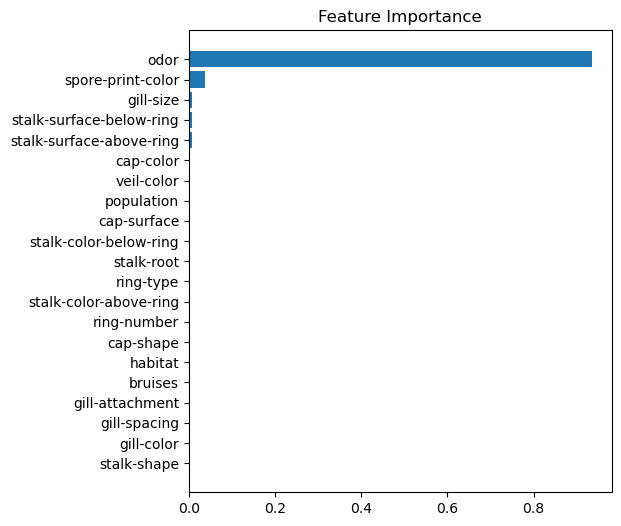

In [71]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title("Feature Importance")

result = permutation_importance(
    model, test_X, test_y, n_repeats=10, random_state=42, n_jobs=2
)

In [72]:
feature_importance

array([1.46720419e-04, 1.09196983e-03, 3.11437355e-03, 3.17702124e-05,
       9.34696037e-01, 2.87124826e-05, 4.99886366e-06, 6.83540113e-03,
       1.58736046e-15, 0.00000000e+00, 5.21132938e-04, 6.14063554e-03,
       6.25580600e-03, 1.85126737e-04, 7.78610704e-04, 1.75219664e-03,
       1.47556886e-04, 3.65248184e-04, 3.65220148e-02, 1.29162979e-03,
       9.00580772e-05])

In [73]:
col = 'odor'
new_df = df.loc[:, df.columns != col]
y = df['class']
col = 'class'
X = new_df.loc[:, new_df.columns != col]

rem_X, test_X, rem_y, test_y = train_test_split(X,y, test_size=0.1, random_state=42, shuffle=True)
train_X, valid_X, train_y, valid_y = train_test_split(rem_X, rem_y, test_size=0.2)

In [74]:
model = GradientBoostingClassifier(verbose=1).fit(train_X, train_y)

      Iter       Train Loss   Remaining Time 
         1           1.2144            0.00s
         2           1.0742            0.00s
         3           0.9572            0.47s
         4           0.8587            0.40s
         5           0.7743            0.31s
         6           0.7015            0.26s
         7           0.6378            0.22s
         8           0.5830            0.35s
         9           0.5355            0.34s
        10           0.4907            0.32s
        20           0.2409            0.26s
        30           0.1430            0.22s
        40           0.1014            0.19s
        50           0.0722            0.14s
        60           0.0542            0.12s
        70           0.0422            0.09s
        80           0.0333            0.06s
        90           0.0264            0.03s
       100           0.0233            0.00s


In [75]:
model.score(valid_X, valid_y)

1.0

In [76]:
model.score(test_X, test_y)

1.0

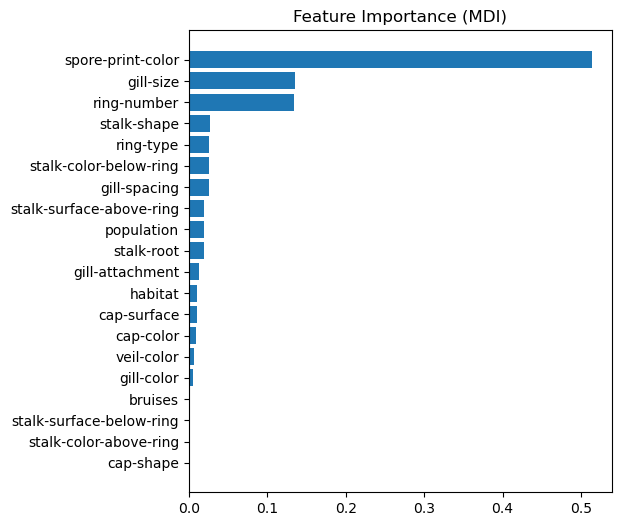

In [77]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    model, test_X, test_y, n_repeats=10, random_state=42, n_jobs=2
)

In [78]:
col = 'spore-print-color'
df2 = new_df.loc[:, new_df.columns != col]
y = df['class']
col = 'class'
X = df2.loc[:, df2.columns != col]
df2

rem_X, test_X, rem_y, test_y = train_test_split(X,y, test_size=0.1, random_state=42, shuffle=True)
train_X, valid_X, train_y, valid_y = train_test_split(rem_X, rem_y, test_size=0.2)

In [79]:
model = GradientBoostingClassifier(verbose=1).fit(train_X, train_y)

      Iter       Train Loss   Remaining Time 
         1           1.2311            0.00s
         2           1.1046            0.00s
         3           0.9994            0.00s
         4           0.9108            0.36s
         5           0.8353            0.31s
         6           0.7704            0.26s
         7           0.7144            0.22s
         8           0.6650            0.19s
         9           0.6228            0.17s
        10           0.5846            0.28s
        20           0.3423            0.24s
        30           0.2036            0.19s
        40           0.1286            0.17s
        50           0.0934            0.15s
        60           0.0683            0.12s
        70           0.0510            0.09s
        80           0.0387            0.06s
        90           0.0286            0.03s
       100           0.0215            0.00s


In [80]:
model.score(valid_X, valid_y)

1.0

In [81]:
model.score(test_X, test_y)

1.0

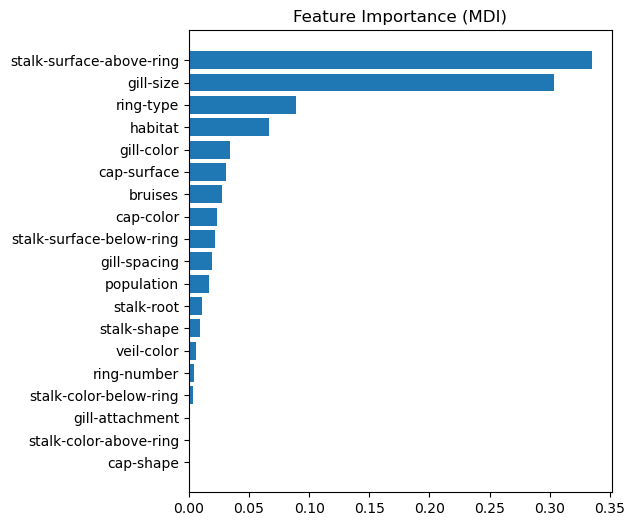

In [82]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    model, test_X, test_y, n_repeats=10, random_state=42, n_jobs=2
)

# PCA

In [83]:
# pca = PCA(n_components=2)

# principalComponents = pca.fit_transform(X)

# principalDf = pd.DataFrame(data = principalComponents
#              , columns = ['principal component 1', 'principal component 2'])

In [84]:
# finalDf = pd.concat([principalDf, df[['class']]], axis = 1)

In [85]:
# fig = plt.figure(figsize = (8,8))
# ax = fig.add_subplot(1,1,1) 
# ax.set_xlabel('Principal Component 1', fontsize = 15)
# ax.set_ylabel('Principal Component 2', fontsize = 15)
# ax.set_title('2 component PCA', fontsize = 20)

# targets = [0, 1]
# colors = ['r', 'g', 'b']
# for target, color in zip(targets,colors):
#     indicesToKeep = finalDf['class'] == target
#     ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
#                , finalDf.loc[indicesToKeep, 'principal component 2']
#                , c = color
#                , s = 50)
# ax.legend(targets)
# ax.grid()

In [86]:
# pca.explained_variance_ratio_

In [87]:
pca = PCA(.95)

In [88]:
pca.fit(X)

PCA(n_components=0.95)

In [92]:
X1 = pca.transform(X)
validX = pca.transform(valid_X)
testX= pca.transform(test_X)

In [93]:
PCAModel = GradientBoostingClassifier(verbose=1).fit(X1,y)
PCAModel.score(validX, valid_y)

      Iter       Train Loss   Remaining Time 
         1           1.2602            1.02s
         2           1.1569            2.11s
         3           1.0722            2.07s
         4           0.9991            1.78s
         5           0.9368            2.00s
         6           0.8833            1.90s
         7           0.8358            1.82s
         8           0.7951            1.93s
         9           0.7590            1.86s
        10           0.7286            1.79s
        20           0.5182            1.66s
        30           0.4201            1.50s
        40           0.3596            1.29s
        50           0.3116            1.07s
        60           0.2733            0.85s
        70           0.2422            0.64s
        80           0.2106            0.43s
        90           0.1891            0.21s
       100           0.1683            0.00s


0.9829118250170882

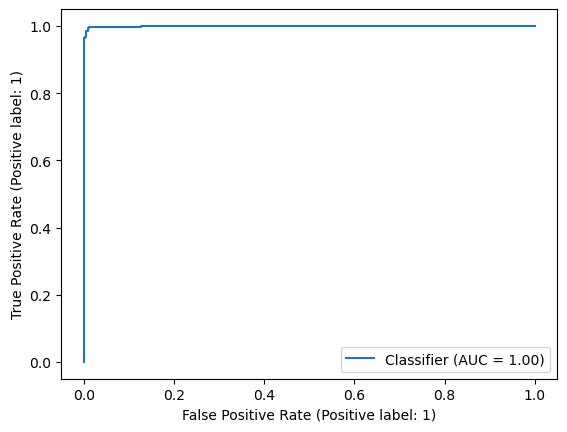

In [94]:
y_pred = PCAModel.decision_function(testX)
RocCurveDisplay.from_predictions(test_y, y_pred) 

# New Dataset

https://archive.ics.uci.edu/ml/machine-learning-databases/00615/

Link to 61K mushroom dataset UCI

https://www.causal.app/excel/csv-files-open-with-data-in-a-single-column

Used link to convert the dataset into readable set

In [16]:
df1 = pd.read_csv(r"secondary_data.csv")
print(df1)

      class  cap-diameter cap-shape cap-surface cap-color  \
0         p         15.26         x           g         o   
1         p         16.60         x           g         o   
2         p         14.07         x           g         o   
3         p         14.17         f           h         e   
4         p         14.64         x           h         o   
...     ...           ...       ...         ...       ...   
61064     p          1.18         s           s         y   
61065     p          1.27         f           s         y   
61066     p          1.27         s           s         y   
61067     p          1.24         f           s         y   
61068     p          1.17         s           s         y   

      does-bruise-or-bleed gill-attachment gill-spacing gill-color  \
0                        f               e          NaN          w   
1                        f               e          NaN          w   
2                        f               e          NaN  

In [17]:
df1.dtypes

class                    object
cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-spacing             object
gill-color               object
stem-height             float64
stem-width              float64
stem-root                object
stem-surface             object
stem-color               object
veil-type                object
veil-color               object
has-ring                 object
ring-type                object
spore-print-color        object
habitat                  object
season                   object
dtype: object

In [18]:
#Check if there are any NAN values in the dataset

df1.isnull().values.any()

True

In [19]:
df1.pop(df.columns[18])
df1

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,17.09,s,y,w,u,w,t,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,18.19,s,y,w,u,w,t,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,17.74,s,y,w,u,w,t,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,15.98,s,y,w,u,w,t,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,17.20,s,y,w,u,w,t,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,f,3.93,6.22,NaN,NaN,y,NaN,NaN,f,NaN,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,5.43,NaN,NaN,y,NaN,NaN,f,NaN,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,6.37,NaN,NaN,y,NaN,NaN,f,NaN,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,5.44,NaN,NaN,y,NaN,NaN,f,NaN,d,u


In [20]:
df1=df1.dropna(axis=1)
df1

,class,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,habitat,season
0,p,15.26,x,o,f,w,16.95,17.09,w,t,d,w
1,p,16.60,x,o,f,w,17.99,18.19,w,t,d,u
2,p,14.07,x,o,f,w,17.80,17.74,w,t,d,w
3,p,14.17,f,e,f,w,15.77,15.98,w,t,d,w
4,p,14.64,x,o,f,w,16.53,17.20,w,t,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,y,f,f,3.93,6.22,y,f,d,a
61065,p,1.27,f,y,f,f,3.18,5.43,y,f,d,a
61066,p,1.27,s,y,f,f,3.86,6.37,y,f,d,u
61067,p,1.24,f,y,f,f,3.56,5.44,y,f,d,u


In [21]:
for column in df1:
    df1[column] = pd.factorize(df1[column])[0]
df1

C:\Users\stany\AppData\Local\Temp\ipykernel_17972\2810315927.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[column] = pd.factorize(df1[column])[0]
C:\Users\stany\AppData\Local\Temp\ipykernel_17972\2810315927.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[column] = pd.factorize(df1[column])[0]
C:\Users\stany\AppData\Local\Temp\ipykernel_17972\2810315927.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

,class,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,habitat,season
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,1,1,0,0,0,1
2,0,2,0,0,0,0,2,2,0,0,0,0
3,0,3,1,1,0,0,3,3,0,0,0,0
4,0,4,0,0,0,0,4,4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
61064,0,1722,5,6,0,11,1362,2371,1,1,0,2
61065,0,1798,1,6,0,11,1576,2118,1,1,0,2
61066,0,1798,5,6,0,11,1354,2079,1,1,0,1
61067,0,1800,1,6,0,11,1555,2112,1,1,0,1


In [22]:
y = df1['class']
col = 'class'
X = df1.loc[:, df1.columns != col]

In [23]:
rem_X, test_X, rem_y, test_y = train_test_split(X,y, test_size=0.1, random_state=42, shuffle=True)
train_X, valid_X, train_y, valid_y = train_test_split(rem_X, rem_y, test_size=0.2)
    

In [103]:
basemodel = LogisticRegression().fit(X, y)
basemodel.score(valid_X, valid_y)

C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.589102155917402

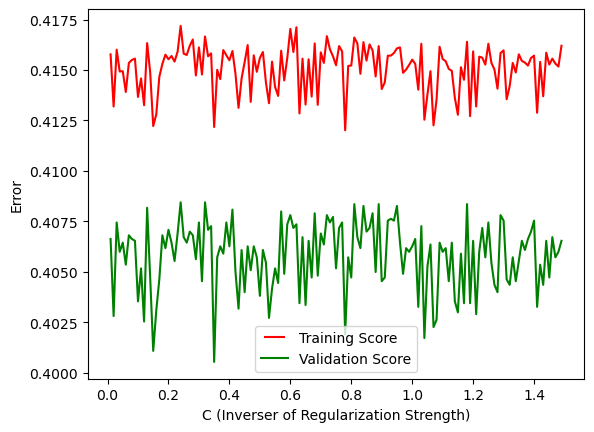

In [116]:
train_results = []
test_results = []
test = []
Cs = np.arange(0.01, 1.5, 0.01)

for C in Cs:
    model = LogisticRegression(C=C, max_iter = 1000).fit(X,y)
    model.score(valid_X, valid_y)
    
    test.append(model.score(valid_X, valid_y))
    train_results.append(1 - (model.score(X,y)))
    test_results.append(1 - (model.score(valid_X, valid_y)))

line1, = plt.plot(Cs, train_results, color="r", label="Training Score")
line2, = plt.plot(Cs, test_results, color="g", label="Validation Score")

fig = plt.gcf()
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Error')
plt.xlabel('C (Inverser of Regularization Strength)')
plt.show()
fig.savefig('BaseModel_CNewData.png')

In [149]:
model = GradientBoostingClassifier().fit(X,y)
model.fit(X, y)
model.score(valid_X, valid_y)

0.8395342490675884

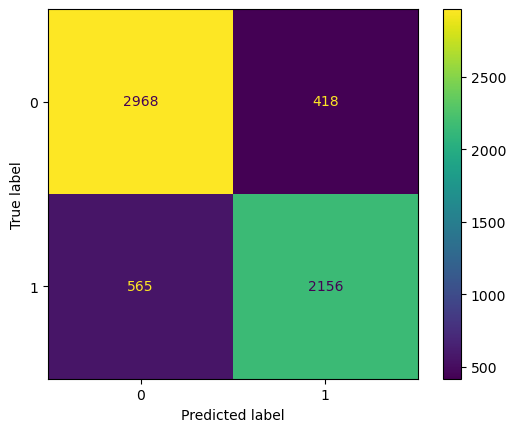

In [151]:
predictions = model.predict(test_X)
cm = confusion_matrix(test_y, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
fig = plt.gcf()
plt.show()
fig.savefig('BaseModel_ConfusionMatrixGradNewData.png')

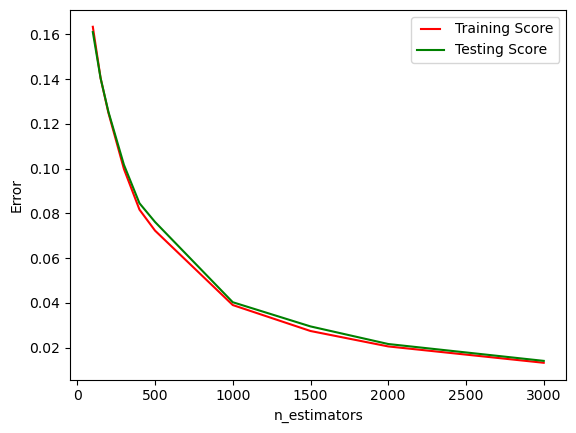

In [115]:
train_results = []
test_results = []
list_nb_trees = [100, 150, 200, 300, 400, 500, 1000, 1500, 2000, 3000]

for nb_trees in list_nb_trees:
    modelG = GradientBoostingClassifier(n_estimators= nb_trees)
    modelG.fit(X, y)

    train_results.append(1 - (modelG.score(X,y)))
    test_results.append(1 - (modelG.score(test_X, test_y)))

line1, = plt.plot(list_nb_trees, train_results, color="r", label="Training Score")
line2, = plt.plot(list_nb_trees, test_results, color="g", label="Testing Score")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Error')
plt.xlabel('n_estimators')
fig = plt.gcf()
plt.show()
fig.savefig('BaseGradientBoostingClassifierNewData.png')

In [155]:
n = 10
compiled_models = []


losss = ['log_loss', 'deviance', 'exponential']
learning_rates = [0.1, 0.3]
criterions = ['friedman_mse', 'squared_error']
max_depths = [3, 4, 5]

counter = 0

for loss in losss:
    for learning_rate in learning_rates:
        for criterion in criterions:
            for max_depth in max_depths:


                print(f"Compiled Model: {counter}\n")

                try:
                    model = GradientBoostingClassifier(loss = loss,
                                                       learning_rate = learning_rate,
                                                       criterion = criterion,
                                                       max_depth = max_depth).fit(X, y)
                except:
                    counter += 1
                    continue

                compiled_models.append([float(model.score(valid_X, valid_y)), model])
                counter += 1

compiled_models.sort(key=lambda row: (row[0]))
compiled_models = compiled_models[::-1]
compiled_models = compiled_models[0:n]

for i, model in enumerate(compiled_models):
    print(model[0], model[1])
    filename = f'PIKLE/GBOOST{i}'
    pk.dump(model[1], open(filename, 'wb'))

Compiled Model: 0

Compiled Model: 1

Compiled Model: 2

Compiled Model: 3

Compiled Model: 4

Compiled Model: 5

Compiled Model: 6

Compiled Model: 7

Compiled Model: 8

Compiled Model: 9

Compiled Model: 10

Compiled Model: 11

Compiled Model: 12



C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


Compiled Model: 13



C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


Compiled Model: 14



C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


Compiled Model: 15



C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


Compiled Model: 16



C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


Compiled Model: 17



C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


Compiled Model: 18



C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


Compiled Model: 19



C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


Compiled Model: 20



C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


Compiled Model: 21



C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


Compiled Model: 22



C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


Compiled Model: 23



C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


Compiled Model: 24

Compiled Model: 25

Compiled Model: 26

Compiled Model: 27

Compiled Model: 28

Compiled Model: 29

Compiled Model: 30

Compiled Model: 31

Compiled Model: 32

Compiled Model: 33

Compiled Model: 34

Compiled Model: 35

0.9835349768034204 GradientBoostingClassifier(criterion='squared_error', learning_rate=0.3,
                           loss='exponential', max_depth=5)
0.9835349768034204 GradientBoostingClassifier(learning_rate=0.3, loss='exponential', max_depth=5)
0.982170472118621 GradientBoostingClassifier(criterion='squared_error', learning_rate=0.3,
                           loss='deviance', max_depth=5)
0.982170472118621 GradientBoostingClassifier(learning_rate=0.3, loss='deviance', max_depth=5)
0.982170472118621 GradientBoostingClassifier(criterion='squared_error', learning_rate=0.3,
                           max_depth=5)
0.982170472118621 GradientBoostingClassifier(learning_rate=0.3, max_depth=5)
0.9645228781952151 GradientBoostingClassifier(criterion='squ

In [24]:
model = GradientBoostingClassifier(criterion='squared_error', learning_rate=0.3,
                           loss='exponential', max_depth=5, n_estimators = 500).fit(X,y)
model.fit(X, y)
model.score(valid_X, valid_y)

0.9999090330210134

In [25]:
model.score(test_X, test_y)

0.9995087604388406

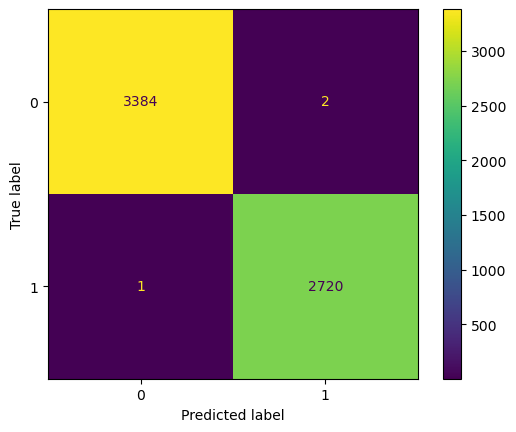

In [158]:
predictions = model.predict(test_X)
cm = confusion_matrix(test_y, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
fig = plt.gcf()
plt.show()
fig.savefig('BestModel_ConfusionMatrixGradNewData.png')

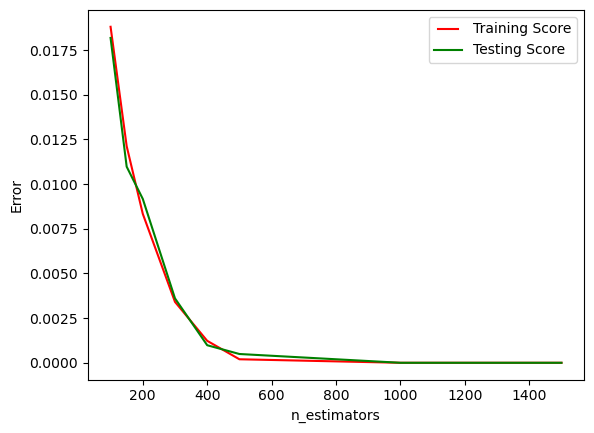

In [160]:
train_results = []
test_results = []
list_nb_trees = [100, 150, 200, 300, 400, 500, 1000, 1500]

for nb_trees in list_nb_trees:
    modelG = GradientBoostingClassifier(criterion='squared_error', learning_rate=0.3,
                           loss='exponential', max_depth=5, n_estimators= nb_trees)
    modelG.fit(X, y)

    train_results.append(1 - (modelG.score(X,y)))
    test_results.append(1 - (modelG.score(test_X, test_y)))

line1, = plt.plot(list_nb_trees, train_results, color="r", label="Training Score")
line2, = plt.plot(list_nb_trees, test_results, color="g", label="Testing Score")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Error')
plt.xlabel('n_estimators')
fig = plt.gcf()
plt.show()
fig.savefig('BestGradientBoostingClassifierNewData.png')